In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import reshape
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


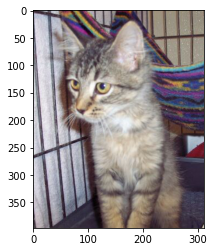

In [58]:
img = image.load_img("/content/drive/MyDrive/temp/training/cat/2.jpg")
plt.imshow(img)

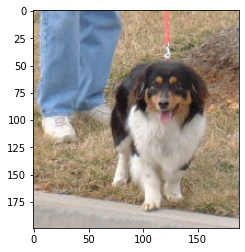

In [59]:
imgdog = image.load_img("/content/drive/MyDrive/temp/training/dog/2.jpg")
plt.imshow(imgdog)

In [60]:
print(cv2.imread("/content/drive/MyDrive/temp/training/cat/2.jpg").shape)
print("\n")
print(cv2.imread("/content/drive/MyDrive/temp/training/dog/2.jpg").shape)

(397, 312, 3)


(199, 188, 3)


In [61]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [62]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/temp/training",
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')


vld_dataset = validation.flow_from_directory("/content/drive/MyDrive/temp/validation",
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 22 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [63]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [64]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Input


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(200,200,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='softmax'))

In [65]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics='accuracy')
#model.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
fitmodel = model.fit(train_dataset, steps_per_epoch=3, epochs=10, validation_data= vld_dataset, batch_size=128)

Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 4.3663 - accuracy: 0.2778

In [ ]:
#4. Plot the loss and accuracy using .

plt.plot(fitmodel.history['accuracy'])
plt.plot(fitmodel.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

earlystopmodel = model.fit(train_dataset,steps_per_epoch=3, epochs=5, batch_size=512,validation_data= vld_dataset, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

In [ ]:
from keras.callbacks import ModelCheckpoint

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

checkpointmodel = model.fit(train_dataset,steps_per_epoch=3, epochs=5, batch_size=512,validation_data= vld_dataset, callbacks=[model_checkpoint_callback])